In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import pickle
import itertools
import matplotlib as mpl
import seaborn as sns

mpl.rcParams.update({
    'font.size'           : 18.0,
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'medium',
    'xtick.labelsize'     : 'medium',
    'ytick.labelsize'     : 'medium',
    'legend.fontsize'     : 'medium',
})
plt.style.use('seaborn')

# Generate confusion matrix

In [14]:
with open('logs/transfer_model_eval_cm.txt', 'rb') as f:
    cm_xc_model = pickle.load(f)
class_names = ['Biological', 'Fibres', 'Films_Coated_Surface', 'MEMS_devices_and_electrodes', 'Nanowires', 'Particles', 'Patterned_surface', 'Porous_Sponge', 'Powder', 'Tips']

In [15]:
cm_xc_model

array([[178,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,  37,   0,   0,   1,   0,   0,   0,   0,   0],
       [  3,   0,  56,   0,   0,   2,   0,   0,   4,   0],
       [  0,   1,   0, 858,   6,   1,  33,   0,   0,   6],
       [  6,   1,   5,   5, 695,  12,   3,   0,   3,   4],
       [  6,   0,   7,   2,   9, 721,  16,   0,   4,   1],
       [  1,   1,   2,  37,   4,   7, 873,   0,   1,   3],
       [  0,   0,   0,   1,   1,   0,   0,  29,   2,   1],
       [  4,   0,   1,   1,   2,   4,   0,   1, 176,   0],
       [  1,   0,   0,   5,   3,   2,   3,   0,   0, 317]])

In [16]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix for xception model',
                          cmap=plt.cm.jet):
    """
    This function prints and plots the confusion matrix.
    """
    
    fig, ax = plt.subplots(1,1,figsize = (8,8))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #print(len(classes))
    ax.set_title(title)
    plt.colorbar(ax=ax)

    plt.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    
    ax.xaxis.set_ticklabels(classes)
    ax.yaxis.set_ticklabels(classes)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    
    
    plt.savefig('img/confusion_xc_model.png',bbox_inches = "tight")
    

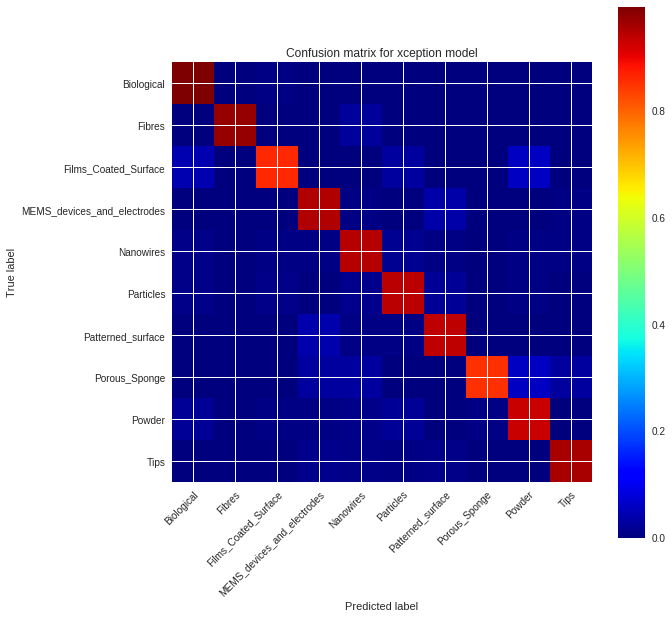

In [17]:
plot_confusion_matrix(cm_xc_model, class_names)

In [18]:
#normalize confusion matrix
norm = np.linalg.norm(cm_xc_model)
normal_cm_xc_model = cm_xc_model/norm
print(normal_cm_xc_model)

[[0.10887105 0.         0.00061164 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.0226305  0.         0.         0.00061164 0.
  0.         0.         0.         0.        ]
 [0.00183491 0.         0.03425157 0.         0.         0.00122327
  0.         0.         0.00244654 0.        ]
 [0.         0.00061164 0.         0.52478291 0.00366981 0.00061164
  0.02018396 0.         0.         0.00366981]
 [0.00366981 0.00061164 0.00305818 0.00305818 0.42508639 0.00733962
  0.00183491 0.         0.00183491 0.00244654]
 [0.00366981 0.         0.00428145 0.00122327 0.00550472 0.4409889
  0.00978616 0.         0.00244654 0.00061164]
 [0.00061164 0.00061164 0.00122327 0.0226305  0.00244654 0.00428145
  0.53395744 0.         0.00061164 0.00183491]
 [0.         0.         0.         0.00061164 0.00061164 0.
  0.         0.01773742 0.00122327 0.00061164]
 [0.00244654 0.         0.00061164 0.00061164 0.00122327 0.00244654
  0.         0.00061164 0.10764778 0.

# find commonly confused labels

In [19]:
from heapq import nlargest
from collections import defaultdict

d = defaultdict(list)

for i in range(len(normal_cm_xc_model)):
    for j in range(i):
      d[normal_cm_xc_model[i][j]].append((i, j))

for value, positions in nlargest(5, d.items(), key=lambda item: item[0]):
    print (class_names[positions[0][0]] + " for " + class_names[positions[0][1]], f'{value*100:1f}%')

Patterned_surface for MEMS_devices_and_electrodes 2.263050%
Particles for Nanowires 0.550472%
Particles for Films_Coated_Surface 0.428145%
Nanowires for Biological 0.366981%
Nanowires for Films_Coated_Surface 0.305818%


# plot model metrics for simply and transfer learning CNN

In [24]:
xc_validation_accuracy = pd.read_csv('logs/run-validation-tag-epoch_accuracy-20.csv')
xc_validation_loss = pd.read_csv('logs/run-validation-tag-epoch_loss-20.csv')

xc_train_accuracy = pd.read_csv('logs/run-train-tag-epoch_accuracy-20.csv')
xc_train_loss = pd.read_csv('logs/run-train-tag-epoch_loss-20.csv')

In [25]:
xc_validation_accuracy

,Wall time,Step,Value
0,1591651513,0,0.813429
1,1591652570,1,0.846523
2,1591653622,2,0.858753
3,1591654691,3,0.866667
4,1591655759,4,0.870983
5,1591657016,5,0.907194
6,1591658280,6,0.929257
7,1591659542,7,0.931415
8,1591660802,8,0.942206
9,1591662065,9,0.940528


In [26]:
xc_validation_accuracy.drop('Wall time',axis=1, inplace=True)
xc_validation_accuracy = xc_validation_accuracy.rename(columns={'Value': 'Validation_accuracy'})
xc_validation_accuracy.set_index('Step',inplace=True)

In [27]:
xc_validation_accuracy

,Validation_accuracy
Step,
0,0.813429
1,0.846523
2,0.858753
3,0.866667
4,0.870983
5,0.907194
6,0.929257
7,0.931415
8,0.942206


In [28]:
xc_train_accuracy.drop('Wall time',axis=1, inplace=True)
xc_train_accuracy = xc_train_accuracy.rename(columns={'Value': 'train_accuracy'})
xc_train_accuracy.set_index('Step',inplace=True)

In [29]:
xc_train_accuracy

,train_accuracy
Step,
0,0.752940
1,0.834246
2,0.850615
3,0.861772
4,0.869188
5,0.873864
6,0.919027
7,0.942410
8,0.955305


In [30]:
xc_validation_loss.drop('Wall time',axis=1, inplace=True)
xc_validation_loss = xc_validation_loss.rename(columns={'Value': 'validation_loss'})
xc_validation_loss.set_index('Step',inplace=True)

In [31]:
xc_validation_loss

,validation_loss
Step,
0,0.567975
1,0.465879
2,0.420806
3,0.406038
4,0.396783
5,0.304855
6,0.240831
7,0.237636
8,0.214868


In [32]:
xc_train_loss.drop('Wall time',axis=1, inplace=True)
xc_train_loss = xc_train_loss.rename(columns={'Value': 'train_loss'})
xc_train_loss.set_index('Step',inplace=True)

In [33]:
xc_train_loss

,train_loss
Step,
0,0.791716
1,0.508774
2,0.453274
3,0.419796
4,0.399244
5,0.379849
6,0.243645
7,0.173804
8,0.137532


In [34]:
xc_metrics=xc_train_accuracy.join([xc_validation_accuracy,xc_train_loss,xc_validation_loss])

In [35]:
xc_metrics.to_csv('logs/xc_metrics-20')

In [36]:
xc_metrics

,train_accuracy,Validation_accuracy,train_loss,validation_loss
Step,,,,
0,0.752940,0.813429,0.791716,0.567975
1,0.834246,0.846523,0.508774,0.465879
2,0.850615,0.858753,0.453274,0.420806
3,0.861772,0.866667,0.419796,0.406038
4,0.869188,0.870983,0.399244,0.396783
5,0.873864,0.907194,0.379849,0.304855
6,0.919027,0.929257,0.243645,0.240831
7,0.942410,0.931415,0.173804,0.237636
8,0.955305,0.942206,0.137532,0.214868


In [37]:
xc_metrics=pd.read_csv('logs/xc_metrics-20')

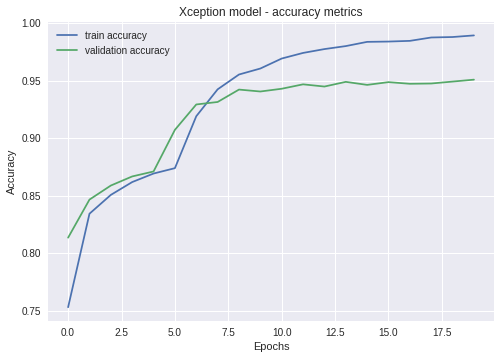

In [46]:
fig,ax = plt.subplots(sharey=True)

ax.plot(np.arange(20),xc_metrics[['train_accuracy','Validation_accuracy']])

ax.set_title('Xception model - accuracy metrics')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epochs')
ax.legend(labels=['train accuracy','validation accuracy'])

plt.savefig('img/accuracy_xc_model-20.png',bbox_inches = "tight")

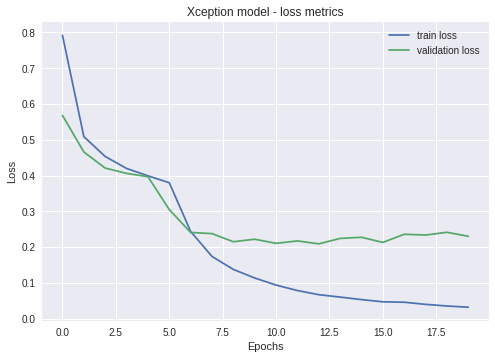

In [47]:
fig,ax = plt.subplots(sharey=True)

ax.plot(np.arange(20),xc_metrics[['train_loss','validation_loss']])

ax.set_title('Xception model - loss metrics')
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
ax.legend(labels=['train loss','validation loss'])

plt.savefig('img/loss_xc_model-20.png',bbox_inches = "tight")

In [7]:
#simple_cnn_metrics=pd.read_csv('logs/simple_cnn_metrics.csv')
#simple_cnn_metrics.drop(['Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)

In [12]:
#simple_cnn_metrics=simple_cnn_metrics.iloc[:5,:]

In [30]:
#simple_cnn_metrics.to_csv('logs/simple_cnn_metrics_clean.csv')

In [48]:
simple_cnn_metrics=pd.read_csv('logs/simple-cnn-20-epochs-metrics.csv')

In [50]:
simple_cnn_metrics.set_index('step',inplace=True)

In [55]:
simple_cnn_metrics=simple_cnn_metrics[1:]
simple_cnn_metrics

,train_accuracy,Validation_accuracy,train_loss,validation_loss
step,,,,
2,0.3479,0.4547,2.2002,1.5844
3,0.4276,0.4460,1.6230,1.6068
4,0.4419,0.4556,1.6415,1.5911
5,0.4230,0.5007,1.6766,1.5662
6,0.4051,0.4659,1.7542,1.6603
7,0.4001,0.4360,1.7378,1.6374
8,0.3900,0.4237,1.7427,1.8220
9,0.3894,0.4338,1.7293,1.7484
10,0.3764,0.4535,1.7534,1.6717


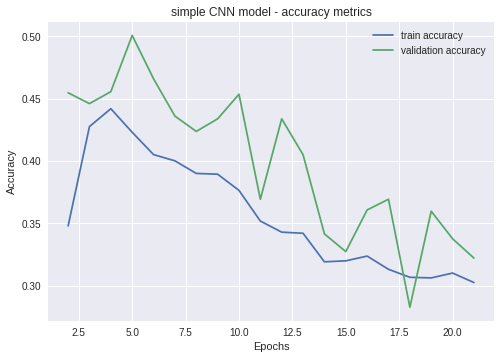

In [56]:

fig,ax = plt.subplots()

ax.plot(np.arange(2,22),simple_cnn_metrics[['train_accuracy','Validation_accuracy']])

ax.set_title('simple CNN model - accuracy metrics')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epochs')
ax.legend(labels=['train accuracy','validation accuracy'])

plt.savefig('img/accuracy_simple_cnn_model-20.png',bbox_inches = "tight")

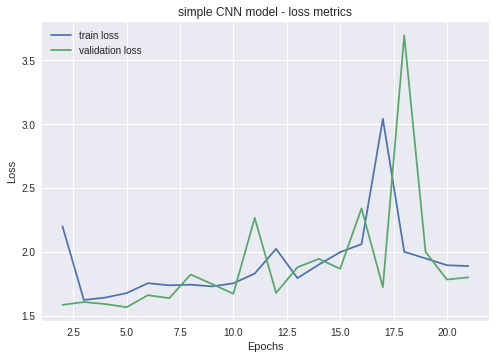

In [57]:

fig,ax = plt.subplots()

ax.plot(np.arange(2,22),simple_cnn_metrics[['train_loss','validation_loss']])

ax.set_title('simple CNN model - loss metrics')
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
ax.legend(labels=['train loss','validation loss'])

plt.savefig('img/loss_simple_cnn_model-20.png',bbox_inches = "tight")